# <p style="background-color:skyblue; font-family:newtimeroman; font-size:180%; text-align:center">Time Series Analysis 📈</p>

# Importing Libraries
* **pandas:** For data manipulation and analysis.
* **plotly:** For interactive plotting.
* **statsmodels:** For statistical models and tests.
* **yfinance:** For retrieving financial data from Yahoo Finance.
* **datetime:** For handling dates.

In [ ]:
pip install yfinance

In [18]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.api as sm
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

**Defining Date Range**

The second cell often defines the date range for the analysis. The date range is usually set to cover a significant period, such as the last 720 days.

In [4]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=720)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [5]:
#Downloading Stock Data
data = yf.download('AAPL', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-06-06  147.029999  148.570007  144.899994  146.139999  144.505112   
2022-06-07  144.350006  149.000000  144.100006  148.710007  147.046371   
2022-06-08  148.580002  149.869995  147.460007  147.960007  146.304733   
2022-06-09  147.080002  147.949997  142.529999  142.639999  141.044266   
2022-06-10  140.279999  140.759995  137.059998  137.130005  135.595932   

              Volume  
Date                  
2022-06-06  71598400  
2022-06-07  67808200  
2022-06-08  53950200  
2022-06-09  69473000  
2022-06-10  91437900  


# Time Series Techniques
**1. Moving Average (MA)**

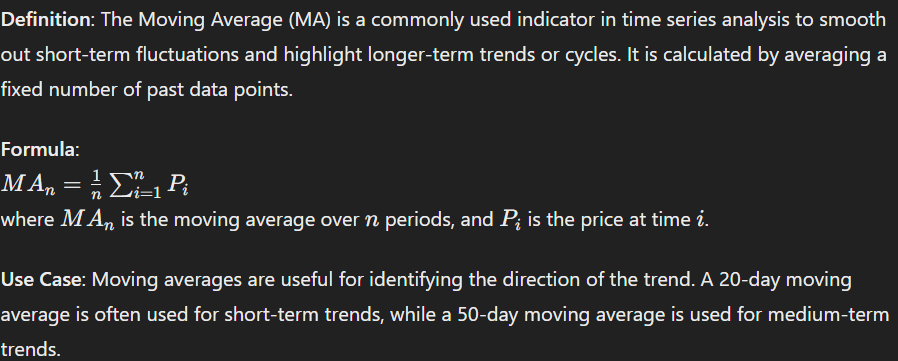

In [20]:
# Calculate moving averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

#Here, two moving averages are calculated: a 20-day moving average and a 50-day moving average.

**2. Exponential Moving Average (EMA)**

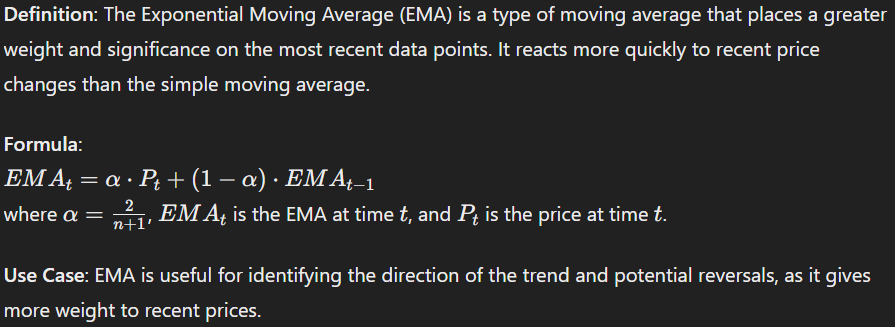

In [21]:
# Calculate Exponential Moving Average (EMA)
data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()
#A 20-day EMA is calculated using the exponentially weighted function.

**3. Bollinger Bands**

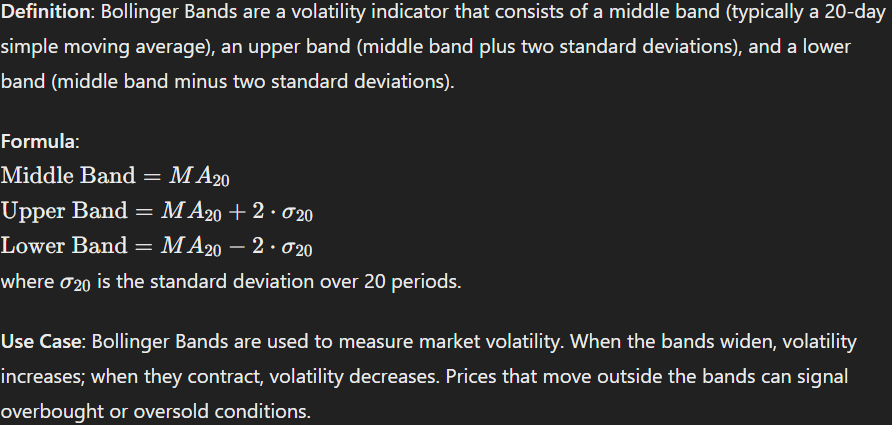

In [22]:
# Calculate Bollinger Bands
data['BB_upper'] = data['MA20'] + 2 * data['Close'].rolling(window=20).std()
data['BB_lower'] = data['MA20'] - 2 * data['Close'].rolling(window=20).std()

#These lines are calculated using the 20-day moving average and standard deviation.

# Plotting the Data
**The stock prices and calculated indicators are plotted using plotly for interactive visualization:**

In [16]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Close'))
fig.add_trace(go.Scatter(x=data.index, y=data['MA20'], mode='lines', name='MA20'))
fig.add_trace(go.Scatter(x=data.index, y=data['MA50'], mode='lines', name='MA50'))
fig.add_trace(go.Scatter(x=data.index, y=data['EMA20'], mode='lines', name='EMA20'))
fig.add_trace(go.Scatter(x=data.index, y=data['BB_upper'], mode='lines', name='BB_upper'))
fig.add_trace(go.Scatter(x=data.index, y=data['BB_lower'], mode='lines', name='BB_lower'))

fig.update_layout(title='AAPL Stock Price with Moving Averages and Bollinger Bands',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

In [7]:
figure = px.line(data, x = data.index, 
                 y = "Close", 
                 title = "Time Series Analysis (Line Plot)")
figure.show()

In [9]:
figure = go.Figure(data=[go.Candlestick(x = data.index,
                                        open = data["Open"], 
                                        high = data["High"],
                                        low = data["Low"], 
                                        close = data["Close"])])
figure.update_layout(title = "Time Series Analysis (Candlestick Chart)", 
                     xaxis_rangeslider_visible = False)
figure.show()

In [10]:
figure = px.bar(data, x = data.index, 
                y = "Close", 
                title = "Time Series Analysis (Bar Plot)" )
figure.show()

In [11]:
figure = go.Figure(data = [go.Candlestick(x = data.index,
                                        open = data["Open"], 
                                        high = data["High"],
                                        low = data["Low"], 
                                        close = data["Close"])])
figure.update_layout(title = "Time Series Analysis (Candlestick Chart with Buttons and Slider)")

figure.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
figure.show()